## Setup

In [1]:
!nvidia-smi

Sun May  4 11:20:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.02              Driver Version: 555.42.02      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H200                    On  |   00000000:C0:00.0 Off |                    0 |
| N/A   33C    P0             81W /  700W |       1MiB / 143771MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
!pace-quota


Gathering storage and job accounting information for user: wchia7

  ** Please note that the information and display format of this tool **
  ** is subject to change and should *not* be used for scripting.    **


                                          Welcome to the ICE Cluster!                                           
 * Your Name (as PACE knows it)          :   Wen Han Chia                  
 * UserID                                :   3370265                       
 * Username                              :   wchia7                        
 * Your Email (for PACE contact)         :                                 

                                                  ICE Storage                                                   
Filesystem                                             Usage (GB)    Limit
Home:/home/hice1/wchia7                                      23.4     30.0  77.8%   
Scratch:/storage/ice1/6/5/wchia7                            176.7    300.0  58.9%   


Install YOLO package

In [3]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO 
import os
from IPython.display import display, Image 
from IPython import display 
display.clear_output()

In [3]:
import ultralytics
print(ultralytics.__version__)

8.3.80


## Evaluate Model's Performance

### Run custom script

In [1]:
!python pipeline_evaluation.py

Traceback (most recent call last):
  File "c:\Projects\OMSCS\Lizard_Classification\Anole_classifier\Spring_2025\pipeline_evaluation.py", line 5, in <module>
    from transformers import AutoImageProcessor, SwinForImageClassification
ModuleNotFoundError: No module named 'transformers'


In [12]:
from sklearn.metrics import accuracy_score
import os
import pandas as pd

RESULTS_PATH = "./inference/run_20250504_110525/eval_results.csv"

if os.path.exists(RESULTS_PATH):
    df = pd.read_csv(RESULTS_PATH)
    y_true_all = df["y_true"].tolist()
    y_pred_all = df["y_pred"].tolist()

    # Compute top-1 accuracy
    top1_acc = accuracy_score(y_true_all, y_pred_all)
    print(f"Top-1 Accuracy: {top1_acc:.4f}")

    print(f"Loaded evaluation results from {RESULTS_PATH}")
else:
    print(f"Cannot find results path {RESULTS_PATH}")



Top-1 Accuracy: 0.8270
Loaded evaluation results from ./inference/run_20250504_110525/eval_results.csv


### Visualize confusion matrix

Cannot find results path


C:\Users\wenha\AppData\Local\Temp\ipykernel_5488\1985584097.py:27: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)


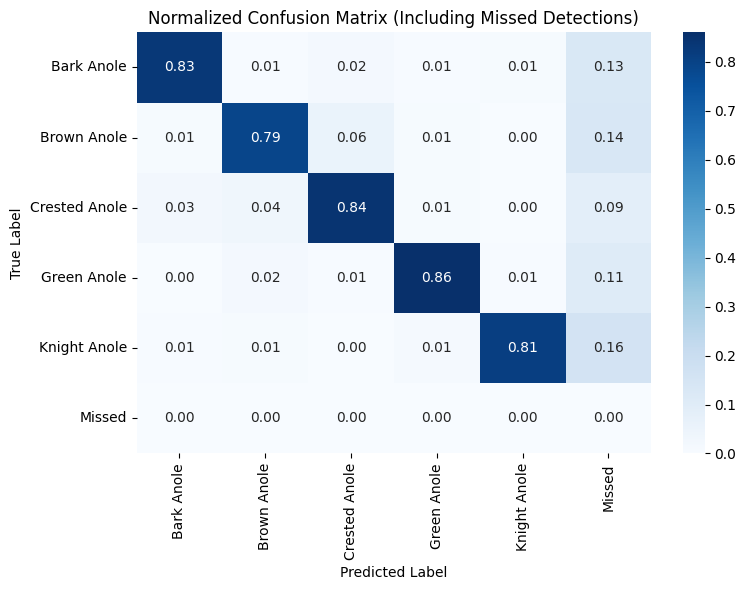

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import os

NUM_CLASSES = 5
MISSED_CLASS_ID = 5
ALL_CLASSES = list(range(NUM_CLASSES)) + [MISSED_CLASS_ID]
CLASS_NAMES = ["Bark Anole", "Brown Anole", "Crested Anole", "Green Anole", "Knight Anole"] + ["Missed"]

RESULTS_PATH = "./inference/run_20250504_112054/eval_results.csv"

if os.path.exists(RESULTS_PATH):
    df = pd.read_csv(RESULTS_PATH)
    y_true_all = df["y_true"].tolist()
    y_pred_all = df["y_pred"].tolist()
    print(f"Loaded evaluation results from {RESULTS_PATH}")
else:
    print("Cannot find results path")

# Compute confusion matrix
cm = confusion_matrix(y_true_all, y_pred_all, labels=ALL_CLASSES)

# Normalize by rows (true labels)
cm_normalized = cm.astype("float") / cm.sum(axis=1, keepdims=True)
cm_normalized = np.nan_to_num(cm_normalized)  # Avoid NaNs

# Plot heatmap
cm_df = pd.DataFrame(cm_normalized, index=CLASS_NAMES, columns=CLASS_NAMES)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Normalized Confusion Matrix (Including Missed Detections)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

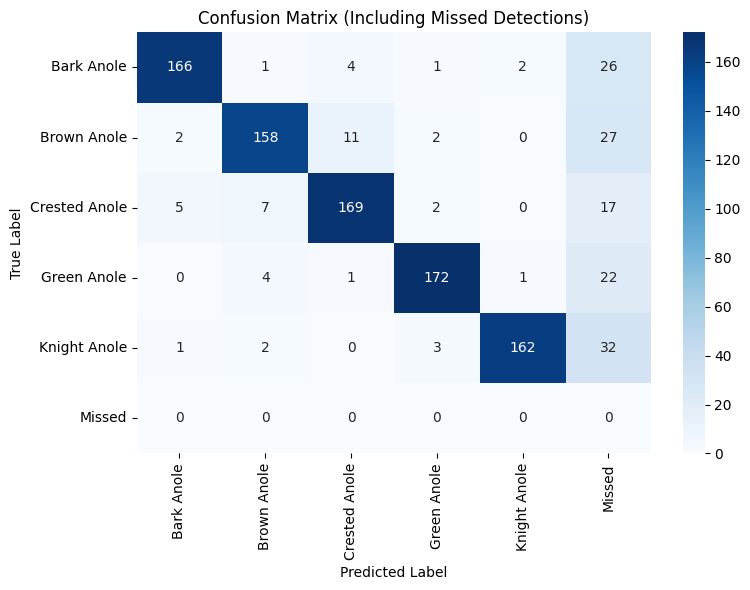

In [14]:
# Plot heatmap
cm_df = pd.DataFrame(cm, index=CLASS_NAMES, columns=CLASS_NAMES)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".0f", cmap="Blues")
plt.title("Confusion Matrix (Including Missed Detections)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()